In [1]:
import pandas as pd
import numpy as np
data_15 = pd.read_csv('./15_sample.csv',index_col=0).reset_index()    #不显示数据集自带索引
pd.set_option('display.max_columns', None) #展示所有列
print('查看数据信息：列名、非空个数、类型等')
print(data_15.info())
print('-'*30)
print('查看数据摘要')
print(data_15.describe())
print('-'*30)
print('查看后5条数据')
print(data_15.tail())

查看数据信息：列名、非空个数、类型等
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62391 entries, 0 to 62390
Data columns (total 30 columns):
time                   62391 non-null object
wind_speed             62391 non-null float64
generator_speed        62391 non-null float64
power                  62391 non-null float64
wind_direction         62391 non-null float64
wind_direction_mean    62391 non-null float64
yaw_position           62391 non-null float64
yaw_speed              62391 non-null float64
pitch1_angle           62391 non-null float64
pitch2_angle           62391 non-null float64
pitch3_angle           62391 non-null float64
pitch1_speed           62391 non-null float64
pitch2_speed           62391 non-null float64
pitch3_speed           62391 non-null float64
pitch1_moto_tmp        62391 non-null float64
pitch2_moto_tmp        62391 non-null float64
pitch3_moto_tmp        62391 non-null float64
acc_x                  62391 non-null float64
acc_y                  62391 non-null float64

In [2]:
data_21 = pd.read_csv('./21_sample.csv',index_col=0) .reset_index()
print('查看数据信息：列名、非空个数、类型等')
print(data_21.info())
print('-'*30)
print('查看数据摘要')
print(data_21.describe())
print('-'*30)
print('查看离散数据分布')
print(data_21.describe(include=['O']))
print('-'*30)
print('查看前5条数据')
print(data_21.head())

查看数据信息：列名、非空个数、类型等
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28053 entries, 0 to 28052
Data columns (total 31 columns):
index                  28053 non-null int64
time                   28053 non-null object
wind_speed             28053 non-null float64
generator_speed        28053 non-null float64
power                  28053 non-null float64
wind_direction         28053 non-null float64
wind_direction_mean    28053 non-null float64
yaw_position           28053 non-null float64
yaw_speed              28053 non-null float64
pitch1_angle           28053 non-null float64
pitch2_angle           28053 non-null float64
pitch3_angle           28053 non-null float64
pitch1_speed           28053 non-null float64
pitch2_speed           28053 non-null float64
pitch3_speed           28053 non-null float64
pitch1_moto_tmp        28053 non-null float64
pitch2_moto_tmp        28053 non-null float64
pitch3_moto_tmp        28053 non-null float64
acc_x                  28053 non-null float64
a

In [3]:
#特征构造
data_15['temp_diff'] = data_15.int_tmp-data_15.environment_tmp #温差
data_15['torque']= data_15.power/data_15.generator_speed #扭矩
data_15['cp'] = data_15.power / data_15.wind_speed**3 #功率系数
data_15['ct'] = data_15.torque/data_15.wind_speed**2 #推力系数

In [4]:
data_15['pitch_angle_ave'] = data_15[['pitch1_angle','pitch2_angle','pitch3_angle']].mean(axis=1)#叶片角均值
data_15['pitch_angle_std'] = data_15[['pitch1_angle','pitch2_angle','pitch3_angle']].std(axis=1,ddof=1)#叶片角标准差
data_15['spd_rate']=data_15.generator_speed/data_15.wind_speed #速率比

In [5]:
data_15['pitch_speed_ave'] = data_15[['pitch1_speed','pitch2_speed','pitch3_speed']].mean(axis=1)#叶片速度均值

In [6]:
#保留有用特征
data_15.drop(['pitch1_angle', 'pitch2_angle', 'pitch3_angle','pitch1_speed', 'pitch2_speed','pitch3_speed'],axis=1,inplace=True)

In [7]:
data_15.columns

Index(['time', 'wind_speed', 'generator_speed', 'power', 'wind_direction',
       'wind_direction_mean', 'yaw_position', 'yaw_speed', 'pitch1_moto_tmp',
       'pitch2_moto_tmp', 'pitch3_moto_tmp', 'acc_x', 'acc_y',
       'environment_tmp', 'int_tmp', 'pitch1_ng5_tmp', 'pitch2_ng5_tmp',
       'pitch3_ng5_tmp', 'pitch1_ng5_DC', 'pitch2_ng5_DC', 'pitch3_ng5_DC',
       'group', 'timestamp', 'Label', 'temp_diff', 'torque', 'cp', 'ct',
       'pitch_angle_ave', 'pitch_angle_std', 'spd_rate', 'pitch_speed_ave'],
      dtype='object')

In [8]:
print(data_15[data_15['Label']==0]['Label'].count())
print(data_15[data_15['Label']==1]['Label'].count()) #数据集分布合适

35566
26825


In [89]:
#分割时间数据，只保留小时作为时间特征
for i in range(len(data_15)):
    data_15.loc[i,'time']=str(data_15.loc[i,'time']).split(' ')[1].split(':')[0]

In [91]:
data_15['time']=data_15['time'].astype(np.int)

In [92]:
data_15.drop(['timestamp'],axis=1,inplace=True)

In [93]:
data_15.columns

Index(['time', 'wind_speed', 'generator_speed', 'power', 'wind_direction',
       'wind_direction_mean', 'yaw_position', 'yaw_speed', 'pitch1_moto_tmp',
       'pitch2_moto_tmp', 'pitch3_moto_tmp', 'acc_x', 'acc_y',
       'environment_tmp', 'int_tmp', 'pitch1_ng5_tmp', 'pitch2_ng5_tmp',
       'pitch3_ng5_tmp', 'pitch1_ng5_DC', 'pitch2_ng5_DC', 'pitch3_ng5_DC',
       'group', 'Label', 'temp_diff', 'torque', 'cp', 'ct', 'pitch_angle_ave',
       'pitch_angle_std', 'spd_rate', 'pitch_speed_ave'],
      dtype='object')

In [96]:
data_15.to_csv('15_processed.csv')

In [95]:
#特征构造
data_21['temp_diff'] = data_21.int_tmp-data_21.environment_tmp #温差
data_21['torque']=data_21.power/data_21.generator_speed #扭矩
data_21['cp'] = data_21.power / data_21.wind_speed**3 #功率系数
data_21['ct'] =data_21.torque/data_21.wind_speed**2 #推力系数
data_21['pitch_angle_ave'] = data_21[['pitch1_angle','pitch2_angle','pitch3_angle']].mean(axis=1)#叶片角均值
data_21['pitch_angle_std'] =data_21[['pitch1_angle','pitch2_angle','pitch3_angle']].std(axis=1,ddof=1)#叶片角标准差
data_21['spd_rate']=data_21.generator_speed/data_21.wind_speed #速率比
data_21['pitch_speed_ave'] = data_21[['pitch1_speed','pitch2_speed','pitch3_speed']].mean(axis=1)#叶片速度均值
#保留有用特征
data_21.drop(['pitch1_angle', 'pitch2_angle', 'pitch3_angle','pitch1_speed', 'pitch2_speed','pitch3_speed'],axis=1,inplace=True)
#分割时间数据，只保留小时作为时间特征
for i in range(len(data_21)):
    data_21.loc[i,'time']=str(data_21.loc[i,'time']).split(' ')[1].split(':')[0]
data_21['time']=data_21['time'].astype(np.int)
data_21.drop(['timestamp'],axis=1,inplace=True)
data_21.to_csv('21_processed.csv')

In [9]:
data_15=pd.read_csv('15_processed.csv')
data_21=pd.read_csv('21_processed.csv')

In [10]:
result_normal=[]
result_abnormal=[]
for i in range(0,24) :
    temp_normal = data_15[(data_15.Label==0) & (data_15['time']==i)]['power'].count()
    temp_abnormal = data_15[(data_15.Label==1) & (data_15['time']==i)]['power'].count()
    result_normal.append(temp_normal)
    result_abnormal.append(temp_abnormal)

In [11]:
from pyecharts import Bar
attr = ['{}时'.format(i) for i in range(24)]

bar=Bar('15号风机各时点结冰数据')
bar.add('正常',attr,result_normal)
bar.add('结冰',attr,result_abnormal)

In [12]:
result_normal=[]
result_abnormal=[]
for i in range(0,24) :
    temp_normal = data_21[(data_21.Label==0) & (data_21['time']==i)]['power'].count()
    temp_abnormal = data_21[(data_21.Label==1) & (data_21['time']==i)]['power'].count()
    result_normal.append(temp_normal)
    result_abnormal.append(temp_abnormal)

attr = ['{}时'.format(i) for i in range(24)]

bar=Bar('21各时点结冰数据')
bar.add('正常',attr,result_normal)
bar.add('结冰',attr,result_abnormal)

In [14]:
data15=pd.read_csv('./data15withperiod.csv').reset_index()
data21=pd.read_csv('./data21withperiod.csv').reset_index()

In [15]:
#分别采用RF,RF+LR,GBDT,GBDT+LR预测
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomTreesEmbedding, RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix
from sklearn.pipeline import make_pipeline

In [16]:
train_features=['wind_speed', 'generator_speed', 'power', 'wind_direction',
       'wind_direction_mean', 'yaw_position', 'pitch1_moto_tmp',
       'pitch2_moto_tmp', 'pitch3_moto_tmp', 'acc_x', 'acc_y',
       'environment_tmp', 'int_tmp', 'pitch1_ng5_DC',  'temp_diff', 'torque', 'cp', 'ct', 'pitch_angle_ave',
       'group','pitch_angle_std', 'spd_rate', 'pitch_speed_ave']

In [17]:
# 处理测试集
test_x=data21[train_features]
test_y=data21['Label']

In [18]:
# 将训练集拆成两个部分（GBDT/RF，LR）
X_train, X_train_lr, y_train, y_train_lr = train_test_split(data15[train_features],data15['Label'],test_size=0.5,random_state=7)
#前半部分只学习特征划分，后半部分通过LR对特征的重要程度排序
#基于随机森林的监督变换
n_estimators=10  #设置分类器数为10
rf = RandomForestClassifier(max_depth=3,
                            n_estimators=n_estimators)
rf.fit(X_train,y_train)
#得到OneHot编码
rf_enc = OneHotEncoder(categories='auto')
rf_enc.fit(rf.apply(X_train))
#使用OneHot编码作为特征训练LR
rf_lm = LogisticRegression(solver='lbfgs',max_iter=1000)
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)),y_train_lr)

#使用RF_LR进行预测，返回预测所有样本标签为1（结冰）的概率数组
y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(test_x)))[:,1]
fpr_rf_lm,tpr_rf_lm,_ = roc_curve(test_y,y_pred_rf_lm)

#基于GBDT监督变换
grd = GradientBoostingClassifier(n_estimators=n_estimators)
grd.fit(X_train,y_train)
#OneHot编码
grd_enc = OneHotEncoder(categories='auto')
grd_enc.fit(grd.apply(X_train)[:, :, 0])
# 使用OneHot编码作为特征，训练LR
grd_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)
# 使用GBDT_LR进行预测
y_pred_grd_lm = grd_lm.predict_proba(grd_enc.transform(grd.apply(test_x)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(test_y, y_pred_grd_lm)
# 直接使用GBDT进行预测
y_pred_grd = grd.predict_proba(test_x)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(test_y, y_pred_grd)

# 直接使用RF进行预测
y_pred_rf = rf.predict_proba(test_x)[:, 1]
fpr_rf, tpr_rf, thresholds_skl = roc_curve(test_y, y_pred_rf)

# 直接使用LR进行预测
LR = LogisticRegression(n_jobs=4, C=0.1, penalty='l2')
LR.fit(X_train, y_train)
y_pred = LR.predict_proba(test_x)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(test_y, y_pred)

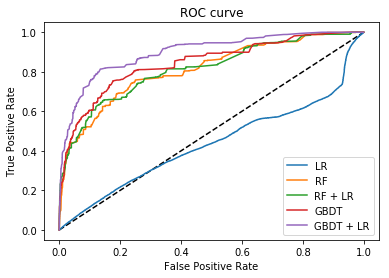

In [19]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBDT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBDT + LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

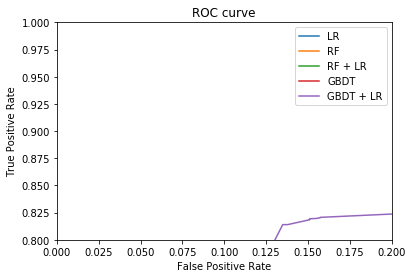

In [20]:
# 将左上角放大显示
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBDT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBDT + LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [21]:
#输出各模型AUC得分，可以看到先用GBDT自动学习新特征再用LR对特征筛选排序的效果最好。
auc_lr = roc_auc_score(test_y, y_pred)
auc_rf = roc_auc_score(test_y, y_pred_rf)
auc_rflm = roc_auc_score(test_y, y_pred_rf_lm)
auc_gbdt = roc_auc_score(test_y, y_pred_grd)
auc_gbdtlr = roc_auc_score(test_y, y_pred_grd_lm)
print('LogisticRegression: %.3f' % auc_lr)
print('RandomForest: %.3f' % auc_rf)
print('RandomForest+LogisticRegression: %.3f' %  auc_rflm)
print('GBDT: %.3f' % auc_gbdt)
print('GBDT+LogisticRegression: %.3f' % auc_gbdtlr)

LogisticRegression: 0.436
RandomForest: 0.812
RandomForest+LogisticRegression: 0.814
GBDT: 0.844
GBDT+LogisticRegression: 0.899


In [22]:
from sklearn.model_selection import cross_val_score
#调用交叉验证评估模型准确率
scores_lr=cross_val_score(LR,test_x,test_y,cv=5,scoring='accuracy').mean()
scores_rf=cross_val_score(rf,test_x,test_y,cv=5,scoring='accuracy').mean()
scores_grd=cross_val_score(grd,test_x,test_y,cv=5,scoring='accuracy').mean()
scores_rf_lm=cross_val_score(rf_lm,test_x,test_y,cv=5,scoring='accuracy').mean()
scores_grd_lm = cross_val_score(grd_lm,test_x,test_y,cv=5,scoring='accuracy').mean()

print('scores_lr 5折交叉验证准确率：\n',scores_lr)
print('scores_rf 5折交叉验证准确率：\n',scores_rf)
print('scores_grd 5折交叉验证准确率：\n',scores_grd)
print('scores_rf_lm 5折交叉验证准确率：\n',scores_rf_lm)
print('scores_grd_lm 5折交叉验证准确率：\n',scores_grd_lm)

scores_lr 5折交叉验证准确率：
 0.3904696688545641
scores_rf 5折交叉验证准确率：
 0.6661978587387709
scores_grd 5折交叉验证准确率：
 0.720953913102319
scores_rf_lm 5折交叉验证准确率：
 0.3904696688545641
scores_grd_lm 5折交叉验证准确率：
 0.3904696688545641


通过新特征改进模型，选择时段

In [128]:
import pandas as pd
import numpy as np
data15=pd.read_csv('./15_processed.csv',index_col=0).reset_index()
data21=pd.read_csv('./21_processed.csv',index_col=0).reset_index()

In [130]:
data15['period']=1
data21['period']=1
for i in range(len(data15)):
    if data15.loc[i,'time']<9 or data15.loc[i,'time']>14:
        data15.loc[i,'period']=0
for i in range(len(data21)):
    if data21.loc[i,'time']<9 or data21.loc[i,'time']>14:
        data21.loc[i,'period']=0

In [131]:
data15.to_csv('./data15withperiod.csv')
data21.to_csv('./data21withperiod.csv')

In [1]:
import pandas as pd
data15 = pd.read_csv('./data15withperiod.csv')
data21 = pd.read_csv('./data21withperiod.csv')

In [2]:
train_features=[ 'time','wind_speed', 'generator_speed', 'power', 'wind_direction',
       'wind_direction_mean', 'yaw_position', 'pitch1_moto_tmp',
       'pitch2_moto_tmp', 'pitch3_moto_tmp', 'acc_x', 'acc_y',
       'environment_tmp', 'int_tmp', 'pitch1_ng5_DC', 'pitch2_ng5_DC', 'pitch3_ng5_DC', 'temp_diff', 'torque', 'cp', 'ct', 'pitch_angle_ave',
       'pitch_angle_std', 'spd_rate', 'pitch_speed_ave','period']
'''
train_features=[ 'wind_speed', 'generator_speed', 'power', 'wind_direction',
       'wind_direction_mean', 'yaw_position', 'pitch1_moto_tmp',
       'pitch2_moto_tmp', 'pitch3_moto_tmp', 'acc_x', 'acc_y',
       'environment_tmp', 'int_tmp', 'pitch1_ng5_DC',  'temp_diff', 'torque', 'cp', 'ct', 'pitch_angle_ave',
       'pitch_angle_std', 'spd_rate', 'pitch_speed_ave','group']'''

"\ntrain_features=[ 'wind_speed', 'generator_speed', 'power', 'wind_direction',\n       'wind_direction_mean', 'yaw_position', 'pitch1_moto_tmp',\n       'pitch2_moto_tmp', 'pitch3_moto_tmp', 'acc_x', 'acc_y',\n       'environment_tmp', 'int_tmp', 'pitch1_ng5_DC',  'temp_diff', 'torque', 'cp', 'ct', 'pitch_angle_ave',\n       'pitch_angle_std', 'spd_rate', 'pitch_speed_ave','group']"

In [3]:
#分别采用RF,RF+LR,GBDT,GBDT+LR预测
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomTreesEmbedding, RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.pipeline import make_pipeline
# 处理测试集
test_x=data21[train_features]
test_y=data21['Label']
# 将训练集拆成两个部分（GBDT/RF，LR）
X_train, X_train_lr, y_train, y_train_lr = train_test_split(data15[train_features],data15['Label'],test_size=0.5,random_state=7)
#前半部分只学习特征划分，后半部分通过LR对特征的重要程度排序
#基于随机森林的监督变换
n_estimators=10  #设置分类器数为10
rf = RandomForestClassifier(max_depth=3,
                            n_estimators=n_estimators)
rf.fit(X_train,y_train)
#得到OneHot编码
rf_enc = OneHotEncoder(categories='auto')
rf_enc.fit(rf.apply(X_train))
#使用OneHot编码作为特征训练LR
rf_lm = LogisticRegression(solver='lbfgs',max_iter=1000)
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)),y_train_lr)

#使用RF_LR进行预测，返回预测所有样本标签为1（结冰）的概率数组
y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(test_x)))[:,1]
fpr_rf_lm,tpr_rf_lm,_ = roc_curve(test_y,y_pred_rf_lm)

#基于GBDT监督变换
grd = GradientBoostingClassifier(n_estimators=n_estimators)
grd.fit(X_train,y_train)
#OneHot编码
grd_enc = OneHotEncoder(categories='auto')
grd_enc.fit(grd.apply(X_train)[:, :, 0])
# 使用OneHot编码作为特征，训练LR
grd_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)
# 使用GBDT_LR进行预测
y_pred_grd_lm = grd_lm.predict_proba(grd_enc.transform(grd.apply(test_x)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(test_y, y_pred_grd_lm)
# 直接使用GBDT进行预测
y_pred_grd = grd.predict_proba(test_x)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(test_y, y_pred_grd)

# 直接使用RF进行预测
y_pred_rf = rf.predict_proba(test_x)[:, 1]
fpr_rf, tpr_rf, thresholds_skl = roc_curve(test_y, y_pred_rf)

# 直接使用LR进行预测
LR = LogisticRegression(n_jobs=4, C=0.1, penalty='l2')
LR.fit(X_train, y_train)
y_pred = LR.predict_proba(test_x)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(test_y, y_pred)

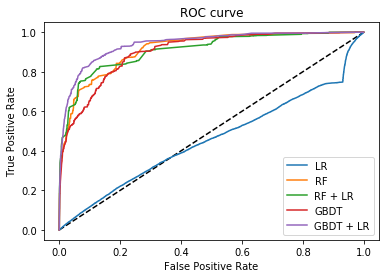

In [4]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBDT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBDT + LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [5]:
#输出各模型AUC得分，可以看到先用GBDT自动学习新特征再用LR对特征筛选排序的效果最好。
auc_lr = roc_auc_score(test_y, y_pred)
auc_rf = roc_auc_score(test_y, y_pred_rf)
auc_rflm = roc_auc_score(test_y, y_pred_rf_lm)
auc_gbdt = roc_auc_score(test_y, y_pred_grd)
auc_gbdtlr = roc_auc_score(test_y, y_pred_grd_lm)
print('LogisticRegression: %.3f' % auc_lr)
print('RandomForest: %.3f' % auc_rf)
print('RandomForest+LogisticRegression: %.3f' %  auc_rflm)
print('GBDT: %.3f' % auc_gbdt)
print('GBDT+LogisticRegression: %.3f' % auc_gbdtlr)

LogisticRegression: 0.457
RandomForest: 0.917
RandomForest+LogisticRegression: 0.910
GBDT: 0.902
GBDT+LogisticRegression: 0.942


In [6]:
from sklearn.model_selection import cross_val_score
#调用交叉验证评估模型准确率
scores_lr=cross_val_score(LR,data15[train_features],data15['Label'],cv=5,scoring='accuracy').mean()
scores_rf=cross_val_score(rf,data15[train_features],data15['Label'],cv=5,scoring='accuracy').mean()
scores_grd=cross_val_score(grd,data15[train_features],data15['Label'],cv=5,scoring='accuracy').mean()
scores_rf_lm=cross_val_score(rf_lm,data15[train_features],data15['Label'],cv=5,scoring='accuracy').mean()
scores_grd_lm = cross_val_score(grd_lm,data15[train_features],data15['Label'],cv=5,scoring='accuracy').mean()

print('scores_lr 5折交叉验证准确率：\n',scores_lr)
print('scores_rf 5折交叉验证准确率：\n',scores_rf)
print('scores_grd 5折交叉验证准确率：\n',scores_grd)
print('scores_rf_lm 5折交叉验证准确率：\n',scores_rf_lm)
print('scores_grd_lm 5折交叉验证准确率：\n',scores_grd_lm)

scores_lr 5折交叉验证准确率：
 0.4106527984484682
scores_rf 5折交叉验证准确率：
 0.8982230586558362
scores_grd 5折交叉验证准确率：
 0.8985112093622624
scores_rf_lm 5折交叉验证准确率：
 0.4106527984484682
scores_grd_lm 5折交叉验证准确率：
 0.4106527984484682


In [11]:
test_x = data21[train_features]
test_y = data21['Label']

In [12]:
from sklearn.model_selection import cross_val_score
#调用交叉验证评估模型准确率
scores_lr=cross_val_score(LR,test_x,test_y,cv=5,scoring='accuracy').mean()
scores_rf=cross_val_score(rf,test_x,test_y,cv=5,scoring='accuracy').mean()
scores_grd=cross_val_score(grd,test_x,test_y,cv=5,scoring='accuracy').mean()
scores_rf_lm=cross_val_score(rf_lm,test_x,test_y,cv=5,scoring='accuracy').mean()
scores_grd_lm = cross_val_score(grd_lm,test_x,test_y,cv=5,scoring='accuracy').mean()

print('scores_lr 5折交叉验证准确率：\n',scores_lr)
print('scores_rf 5折交叉验证准确率：\n',scores_rf)
print('scores_grd 5折交叉验证准确率：\n',scores_grd)
print('scores_rf_lm 5折交叉验证准确率：\n',scores_rf_lm)
print('scores_grd_lm 5折交叉验证准确率：\n',scores_grd_lm)

scores_lr 5折交叉验证准确率：
 0.3469125740087192
scores_rf 5折交叉验证准确率：
 0.7760711945055723
scores_grd 5折交叉验证准确率：
 0.8102253054621826
scores_rf_lm 5折交叉验证准确率：
 0.3469125740087192
scores_grd_lm 5折交叉验证准确率：
 0.3469125740087192


In [89]:
from sklearn.model_selection import cross_val_score
#调用交叉验证评估模型准确率
scores_lr=cross_val_score(LR,data15[train_features],data15['Label'],cv=5,scoring='accuracy').mean()
scores_rf=cross_val_score(rf,data15[train_features],data15['Label'],cv=5,scoring='accuracy').mean()
scores_grd=cross_val_score(grd,data15[train_features],data15['Label'],cv=5,scoring='accuracy').mean()
scores_rf_lm=cross_val_score(rf_lm,data15[train_features],data15['Label'],cv=5,scoring='accuracy').mean()
scores_grd_lm = cross_val_score(grd_lm,data15[train_features],data15['Label'],cv=5,scoring='accuracy').mean()

print('scores_lr 5折交叉验证准确率：\n',scores_lr)
print('scores_rf 5折交叉验证准确率：\n',scores_rf)
print('scores_grd 5折交叉验证准确率：\n',scores_grd)
print('scores_rf_lm 5折交叉验证准确率：\n',scores_rf_lm)
print('scores_grd_lm 5折交叉验证准确率：\n',scores_grd_lm)

scores_lr 5折交叉验证准确率：
 0.4106527984484682
scores_rf 5折交叉验证准确率：
 0.8851758648069387
scores_grd 5折交叉验证准确率：
 0.8985112093622624
scores_rf_lm 5折交叉验证准确率：
 0.4106527984484682
scores_grd_lm 5折交叉验证准确率：
 0.4106527984484682


In [ ]:
数据分割训练，以风速<=1.5或风速>=1.5为例

In [62]:

data15_l=data15[data15['wind_speed']<=1.5]
data15_r=data15[data15['wind_speed']>1.5]
data21_l=data21[data21['wind_speed']<=1.5]
data21_r=data21[data21['wind_speed']>1.5]

In [68]:
# 处理测试集
test_x_l=data21_l[train_features]
test_y_l=data21_l['Label']
test_x_r=data21_l[train_features]
test_y_r=data21_l['Label']
# 将训练集拆成两个部分（GBDT/RF，LR）
X_train_l, X_train_l_lr, y_train_l, y_train_l_lr = train_test_split(data15_l[train_features],data15_l['Label'],test_size=0.5,random_state=7)
X_train_r, X_train_r_lr, y_train_r, y_train_r_lr = train_test_split(data15_r[train_features],data15_r['Label'],test_size=0.5,random_state=7)

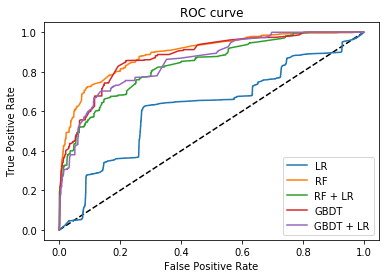

LogisticRegression: 0.622
RandomForest: 0.894
RandomForest+LogisticRegression: 0.833
GBDT: 0.876
GBDT+LogisticRegression: 0.849


In [137]:
#左半部分训练
#基于随机森林的监督变换
n_estimators=10  #设置分类器数为10
rf = RandomForestClassifier(max_depth=3,
                            n_estimators=n_estimators)
rf.fit(X_train_l,y_train_l)
#得到OneHot编码
rf_enc = OneHotEncoder(categories='auto')
rf_enc.fit(rf.apply(X_train_l))
#使用OneHot编码作为特征训练LR
rf_lm = LogisticRegression(solver='lbfgs',max_iter=1000)
rf_lm.fit(rf_enc.transform(rf.apply(X_train_l_lr)),y_train_l_lr)

#使用RF_LR进行预测，返回预测所有样本标签为1（结冰）的概率数组
y_pred_rf_lm_l = rf_lm.predict_proba(rf_enc.transform(rf.apply(test_x_l)))[:,1]
fpr_rf_lm,tpr_rf_lm,_ = roc_curve(test_y_l,y_pred_rf_lm_l)

#基于GBDT监督变换
grd = GradientBoostingClassifier(n_estimators=n_estimators)
grd.fit(X_train_l,y_train_l)
#OneHot编码
grd_enc = OneHotEncoder(categories='auto')
grd_enc.fit(grd.apply(X_train_l)[:, :, 0])
# 使用OneHot编码作为特征，训练LR
grd_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
grd_lm.fit(grd_enc.transform(grd.apply(X_train_l_lr)[:, :, 0]), y_train_l_lr)
# 使用GBDT_LR进行预测
y_pred_grd_lm_l = grd_lm.predict_proba(grd_enc.transform(grd.apply(test_x_l)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(test_y_l, y_pred_grd_lm_l)
# 直接使用GBDT进行预测
y_pred_grd_l = grd.predict_proba(test_x_l)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(test_y_l, y_pred_grd_l)

# 直接使用RF进行预测
y_pred_rf_l = rf.predict_proba(test_x_l)[:, 1]
fpr_rf, tpr_rf, thresholds_skl = roc_curve(test_y_l, y_pred_rf_l)

# 直接使用LR进行预测
LR = LogisticRegression(n_jobs=4, C=0.1, penalty='l2')
LR.fit(X_train_l, y_train_l)
y_pred_l = LR.predict_proba(test_x_l)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(test_y_l, y_pred_l)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBDT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBDT + LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

#输出各模型AUC得分，可以看到先用RF自动学习新特征再用LR对特征筛选排序的效果最好。
auc_lr_l = roc_auc_score(test_y_l, y_pred_l)
auc_rf_l = roc_auc_score(test_y_l, y_pred_rf_l)
auc_rflm_l = roc_auc_score(test_y_l, y_pred_rf_lm_l)
auc_gbdt_l = roc_auc_score(test_y_l, y_pred_grd_l)
auc_gbdtlr_l = roc_auc_score(test_y_l, y_pred_grd_lm_l)
print('LogisticRegression: %.3f' % auc_lr_l)
print('RandomForest: %.3f' % auc_rf_l)
print('RandomForest+LogisticRegression: %.3f' %  auc_rflm_l)
print('GBDT: %.3f' % auc_gbdt_l)
print('GBDT+LogisticRegression: %.3f' % auc_gbdtlr_l)

In [10]:
data15 = pd.read_csv('./data15withperiod.csv')
data21 = pd.read_csv('./data21withperiod.csv')

In [11]:
data15=data15[(data15['power']<2) & (data15['wind_speed']<1.9) &(data15['environment_tmp']<2)&(data15['int_tmp']<1.5)&(data15['int_tmp']>-2.5)]

In [12]:
data21=data21[(data21['power']<2) & (data21['wind_speed']<1.9) &(data21['environment_tmp']<2)&(data21['int_tmp']<1.5)&(data21['int_tmp']>-2.5)]

In [14]:
data15.to_csv('./data15withperiod.csv')
data21.to_csv('./data21withperiod.csv')

In [15]:
data15 = pd.read_csv('./data15withperiod.csv')
data21 = pd.read_csv('./data21withperiod.csv')

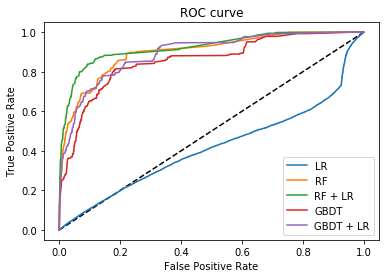

LogisticRegression: 0.416
RandomForest: 0.899
RandomForest+LogisticRegression: 0.923
GBDT: 0.857
GBDT+LogisticRegression: 0.893


In [16]:
#分别采用RF,RF+LR,GBDT,GBDT+LR预测
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomTreesEmbedding, RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.pipeline import make_pipeline
# 处理测试集
test_x=data21[train_features]
test_y=data21['Label']
# 将训练集拆成两个部分（GBDT/RF，LR）
X_train, X_train_lr, y_train, y_train_lr = train_test_split(data15[train_features],data15['Label'],test_size=0.5,random_state=7)
#前半部分只学习特征划分，后半部分通过LR对特征的重要程度排序
#基于随机森林的监督变换
n_estimators=10  #设置分类器数为10
rf = RandomForestClassifier(max_depth=3,
                            n_estimators=n_estimators)
rf.fit(X_train,y_train)
#得到OneHot编码
rf_enc = OneHotEncoder(categories='auto')
rf_enc.fit(rf.apply(X_train))
#使用OneHot编码作为特征训练LR
rf_lm = LogisticRegression(solver='lbfgs',max_iter=1000)
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)),y_train_lr)

#使用RF_LR进行预测，返回预测所有样本标签为1（结冰）的概率数组
y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(test_x)))[:,1]
fpr_rf_lm,tpr_rf_lm,_ = roc_curve(test_y,y_pred_rf_lm)

#基于GBDT监督变换
grd = GradientBoostingClassifier(n_estimators=n_estimators)
grd.fit(X_train,y_train)
#OneHot编码
grd_enc = OneHotEncoder(categories='auto')
grd_enc.fit(grd.apply(X_train)[:, :, 0])
# 使用OneHot编码作为特征，训练LR
grd_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)
# 使用GBDT_LR进行预测
y_pred_grd_lm = grd_lm.predict_proba(grd_enc.transform(grd.apply(test_x)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(test_y, y_pred_grd_lm)
# 直接使用GBDT进行预测
y_pred_grd = grd.predict_proba(test_x)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(test_y, y_pred_grd)

# 直接使用RF进行预测
y_pred_rf = rf.predict_proba(test_x)[:, 1]
fpr_rf, tpr_rf, thresholds_skl = roc_curve(test_y, y_pred_rf)

# 直接使用LR进行预测
LR = LogisticRegression(n_jobs=4, C=0.1, penalty='l2')
LR.fit(X_train, y_train)
y_pred = LR.predict_proba(test_x)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(test_y, y_pred)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBDT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBDT + LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

#输出各模型AUC得分，可以看到先用GBDT自动学习新特征再用LR对特征筛选排序的效果最好。
auc_lr = roc_auc_score(test_y, y_pred)
auc_rf = roc_auc_score(test_y, y_pred_rf)
auc_rflm = roc_auc_score(test_y, y_pred_rf_lm)
auc_gbdt = roc_auc_score(test_y, y_pred_grd)
auc_gbdtlr = roc_auc_score(test_y, y_pred_grd_lm)
print('LogisticRegression: %.3f' % auc_lr)
print('RandomForest: %.3f' % auc_rf)
print('RandomForest+LogisticRegression: %.3f' %  auc_rflm)
print('GBDT: %.3f' % auc_gbdt)
print('GBDT+LogisticRegression: %.3f' % auc_gbdtlr)

RF效果比强规则过滤前提升1个点
RF+LR的效果比过滤前提升7个点
GBDT和GBDT+LR的效果不如过滤前

In [109]:
#数据分割
data15_l=data15[data15['period']==0].drop(['index'],axis=1)
data15_r=data15[data15['period']==1].drop(['index'],axis=1)
data21_l=data21[data21['period']==0].drop(['index'],axis=1)
data21_r=data21[data21['period']==1].drop(['index'],axis=1)

In [114]:
# 处理测试集
test_x_l=data21_l[train_features]
test_y_l=data21_l['Label']
test_x_r=data21_l[train_features]
test_y_r=data21_l['Label']
# 将训练集拆成两个部分（GBDT/RF，LR）
X_train_l, X_train_l_lr, y_train_l, y_train_l_lr = train_test_split(data15_l[train_features],data15_l['Label'],test_size=0.5,random_state=7)
X_train_r, X_train_r_lr, y_train_r, y_train_r_lr = train_test_split(data15_r[train_features],data15_r['Label'],test_size=0.5,random_state=7)

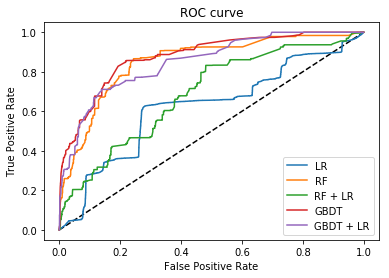

LogisticRegression: 0.622
RandomForest: 0.851
RandomForest+LogisticRegression: 0.688
GBDT: 0.876
GBDT+LogisticRegression: 0.849


In [115]:
#左半部分训练
#基于随机森林的监督变换
n_estimators=10  #设置分类器数为10
rf = RandomForestClassifier(max_depth=3,
                            n_estimators=n_estimators)
rf.fit(X_train_l,y_train_l)
#得到OneHot编码
rf_enc = OneHotEncoder(categories='auto')
rf_enc.fit(rf.apply(X_train_l))
#使用OneHot编码作为特征训练LR
rf_lm = LogisticRegression(solver='lbfgs',max_iter=1000)
rf_lm.fit(rf_enc.transform(rf.apply(X_train_l_lr)),y_train_l_lr)

#使用RF_LR进行预测，返回预测所有样本标签为1（结冰）的概率数组
y_pred_rf_lm_l = rf_lm.predict_proba(rf_enc.transform(rf.apply(test_x_l)))[:,1]
fpr_rf_lm,tpr_rf_lm,_ = roc_curve(test_y_l,y_pred_rf_lm_l)

#基于GBDT监督变换
grd = GradientBoostingClassifier(n_estimators=n_estimators)
grd.fit(X_train_l,y_train_l)
#OneHot编码
grd_enc = OneHotEncoder(categories='auto')
grd_enc.fit(grd.apply(X_train_l)[:, :, 0])
# 使用OneHot编码作为特征，训练LR
grd_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
grd_lm.fit(grd_enc.transform(grd.apply(X_train_l_lr)[:, :, 0]), y_train_l_lr)
# 使用GBDT_LR进行预测
y_pred_grd_lm_l = grd_lm.predict_proba(grd_enc.transform(grd.apply(test_x_l)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(test_y_l, y_pred_grd_lm_l)
# 直接使用GBDT进行预测
y_pred_grd_l = grd.predict_proba(test_x_l)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(test_y_l, y_pred_grd_l)

# 直接使用RF进行预测
y_pred_rf_l = rf.predict_proba(test_x_l)[:, 1]
fpr_rf, tpr_rf, thresholds_skl = roc_curve(test_y_l, y_pred_rf_l)

# 直接使用LR进行预测
LR = LogisticRegression(n_jobs=4, C=0.1, penalty='l2')
LR.fit(X_train_l, y_train_l)
y_pred_l = LR.predict_proba(test_x_l)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(test_y_l, y_pred_l)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBDT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBDT + LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

#输出各模型AUC得分，可以看到先用RF自动学习新特征再用LR对特征筛选排序的效果最好。
auc_lr_l = roc_auc_score(test_y_l, y_pred_l)
auc_rf_l = roc_auc_score(test_y_l, y_pred_rf_l)
auc_rflm_l = roc_auc_score(test_y_l, y_pred_rf_lm_l)
auc_gbdt_l = roc_auc_score(test_y_l, y_pred_grd_l)
auc_gbdtlr_l = roc_auc_score(test_y_l, y_pred_grd_lm_l)
print('LogisticRegression: %.3f' % auc_lr_l)
print('RandomForest: %.3f' % auc_rf_l)
print('RandomForest+LogisticRegression: %.3f' %  auc_rflm_l)
print('GBDT: %.3f' % auc_gbdt_l)
print('GBDT+LogisticRegression: %.3f' % auc_gbdtlr_l)

除GBDT外其余结果都变差

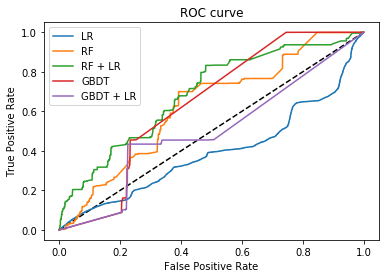

LogisticRegression: 0.392
RandomForest: 0.626
RandomForest+LogisticRegression: 0.388
GBDT: 0.638
GBDT+LogisticRegression: 0.497


In [116]:
#右半部分训练
#基于随机森林的监督变换
n_estimators=10  #设置分类器数为10
rf = RandomForestClassifier(max_depth=3,
                            n_estimators=n_estimators)
rf.fit(X_train_r,y_train_r)
#得到OneHot编码
rf_enc = OneHotEncoder(categories='auto')
rf_enc.fit(rf.apply(X_train_r))
#使用OneHot编码作为特征训练LR
rf_lm = LogisticRegression(solver='lbfgs',max_iter=1000)
rf_lm.fit(rf_enc.transform(rf.apply(X_train_r_lr)),y_train_r_lr)

#使用RF_LR进行预测，返回预测所有样本标签为1（结冰）的概率数组
y_pred_rf_lm_r = rf_lm.predict_proba(rf_enc.transform(rf.apply(test_x_r)))[:,1]
fpr_rf_lm,tpr_rf_lm,_ = roc_curve(test_y_r,y_pred_rf_lm_l)

#基于GBDT监督变换
grd = GradientBoostingClassifier(n_estimators=n_estimators)
grd.fit(X_train_r,y_train_r)
#OneHot编码
grd_enc = OneHotEncoder(categories='auto')
grd_enc.fit(grd.apply(X_train_r)[:, :, 0])
# 使用OneHot编码作为特征，训练LR
grd_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
grd_lm.fit(grd_enc.transform(grd.apply(X_train_r_lr)[:, :, 0]), y_train_r_lr)
# 使用GBDT_LR进行预测
y_pred_grd_lm_r = grd_lm.predict_proba(grd_enc.transform(grd.apply(test_x_r)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(test_y_r, y_pred_grd_lm_r)
# 直接使用GBDT进行预测
y_pred_grd_r = grd.predict_proba(test_x_r)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(test_y_r, y_pred_grd_r)

# 直接使用RF进行预测
y_pred_rf_r = rf.predict_proba(test_x_r)[:, 1]
fpr_rf, tpr_rf, thresholds_skl = roc_curve(test_y_r, y_pred_rf_r)

# 直接使用LR进行预测
LR = LogisticRegression(n_jobs=4, C=0.1, penalty='l2')
LR.fit(X_train_r, y_train_r)
y_pred_r = LR.predict_proba(test_x_r)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(test_y_r, y_pred_r)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBDT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBDT + LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

#输出各模型AUC得分，可以看到先用RF自动学习新特征再用LR对特征筛选排序的效果最好。
auc_lr_r = roc_auc_score(test_y_r, y_pred_r)
auc_rf_r = roc_auc_score(test_y_r, y_pred_rf_r)
auc_rflm_r = roc_auc_score(test_y_r, y_pred_rf_lm_r)
auc_gbdt_r = roc_auc_score(test_y_r, y_pred_grd_r)
auc_gbdtlr_r = roc_auc_score(test_y_r, y_pred_grd_lm_r)
print('LogisticRegression: %.3f' % auc_lr_r)
print('RandomForest: %.3f' % auc_rf_r)
print('RandomForest+LogisticRegression: %.3f' %  auc_rflm_r)
print('GBDT: %.3f' % auc_gbdt_r)
print('GBDT+LogisticRegression: %.3f' % auc_gbdtlr_r)